# Source d'erreur dans le calcul numérique

Nous commençons ce chapitre par un ensemble de considération sur les erreurs de calcul numérique. Ce point est important car soulève souvent certaines confusions. Nous allons donc tâcher par des exemples simples de clarifier ce qu'il en est réellement et quels sont les impacts réels. Nous commencerons par la notion de précision finie des nombres à virgule flottante.

## Précision finie

### Erreur d'arrondi

Le calcul numérique fait appel, généralement, au nombre à virgule flottante. Les calculs ainsi réalisés ont donc une précision finie. Pour nous en convaincre, nous pouvons considérer l'exemple suivant qui illustre très simplement cet état de fait. Dans ce petit programme, nous réalisons la somme algébrique de onze fois la fraction 1/11. D'un point de vue formel, cette somme est égale à 1. Mais d'un point de vue numérique cela est-il le cas ?

In [24]:
a: float = 1.0 / 11.0

if a + a + a + a + a + a + a + a + a + a + a == 1.0:
    print("Equal.")
else:
    print("Not equal.")


Not equal.


Visiblement non, ces deux termes ne sont pas égaux, alors qu'ils devraient. Mais pourquoi n'avons nous pas cette égalité ? En pratique, les nombres "numériques" (ceux utilisé par votre ordinateur) sont représentés sous une forme binaire finie. On parle de nombre à virgule flottante. Dans cette représentation, seulement un nombre fini de nombre est représenté. Par exemple, la fraction 1/11 n'existe pas. Ainsi le résultat de la fraction 1/11 est remplacé par le nombre à virgule flottante le plus proche, ici 0.09090909090909091 pour une représentation en 64 bits. La différence entre le nombre désiré et sa représentation est la précision machine.

La précision machine, on parle aussi de $\epsilon$ machine, est définie comme le plus grand nombre qui, ajouté à n'importe quel autre nombre, est égale à ce deuxième $a + \epsilon \equiv a$ (d'un point de vue numérique). Pour évaluer ce nombre, nous pouvons utilser le programme suivant :

In [25]:
a: float = 1.0
b: float = 0.5

c = a + b

while c != a:
    b /= 2.0
    c = a + b

print(f"{a} + {b} = {a}")


1.0 + 1.1102230246251565e-16 = 1.0


$a$ prend la valeur 1 et b initialisé avec la valeur 0.5. Puis nous calculons la somme de ces deux varaibles que nous stockons dans $c$. Dans la suite, nous entrons dans une boucle qui se répète tant que la quantité $c = a + b$ est différente de $a$. Théoriquement, cette boucle est infinie. Dans cette boucle, nous divisons par deux la quantité stockée dans la variable $b$, puis nous réévaluons la somme $c = a + b$. La quantité $b$ va donc décroître jusqu'à approcher de la précision machine suivant la définition précédemment donnée. Une fois cette quantité évaluée, elle est affichée.

On parle d'erreur d'arrondie (round-off).

Aujourd'hui tout langage de programmation informatique fournit un ensemble d'utilitaire pour connaître la précision, sous tous ces angles, des nombres à virgule flottante utilisés. Par exemple :

In [26]:
import numpy as np

print(np.finfo(float))


Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



### Erreur de troncature

Il y a un autre type d'erreur qui survient quand on remplace une expression mathématique par une approximation. Il s'agit plus d'une erreur liée à l'utilisation d'une forme approchée d'un objet mathématique pour le faire rentrer dans l'ordinateur. Par exemple, que se passe-t-il dans notre ordinateur quand on calcule $\exp(x) = \sum_{n=0}^{\infty} {\frac{x^n}{n!}}$ ? Pas évident de programmer une somme infinie de terme. Exercice 1 : faire un programme qui permet de calculer une forme approchée de la fonction exponentielle en exploitant la notion d'erreur machine. Puis comparer les performances de votre fonction avec la fonction native de votre langage de programmation.


Par exemple, quand on évalue une dérivée par une différence. Cette fois il ne sagit pas d'une erreur de représentation dans la machine.    

Le choix de l'analyse de cette opérateur n'est pas anodine. En effet, nous verrons qu'il est central dans la mise en oeuvre de l'algorithme de Yee (FDTD), mais ne brûlons pas les étapes.

$$
\frac{ dv } { dt } \approx \frac{ \Delta v } { \Delta T } = \frac{ v(t_{i+1}) - v(t_{i}) } { t_{i+1} - t_{i} }
$$

Cette approximation s'appuie sur une troncature de la série de Taylor qui, pour une fonction $f$ indéfinitment dérivable au point $x_0$, donne le développement de la série en ce point, qui s'exprime ainsi :

$$
f(x) = \sum_{k=0}^{\infty}{ \frac{ f^{(k)}(x_0) } {k! } \left( x - x_0 \right)^k }
$$

si on note $x_{i+1} = x_{i} + h$ où $h$ est le pas de discrétisation, nous pouvons approximer la fonction $f$ par troncature comme suit :

$$
f(x_{i+1}) \approx f(x_i) + f'(x_i) h + \frac{1}{2!} f''(x_i) h^2 + \dots + \frac{1}{n!} f^{(n)}(x_i) h^n
$$

Nous donnons ici une représentation de l'ordre de la troncature $n$ sur l'estimation de la fonction $f(x)=-0.1 x^4 - 0.15 x^3 - 0.5 x^2 - 0.25 x + 1.2$

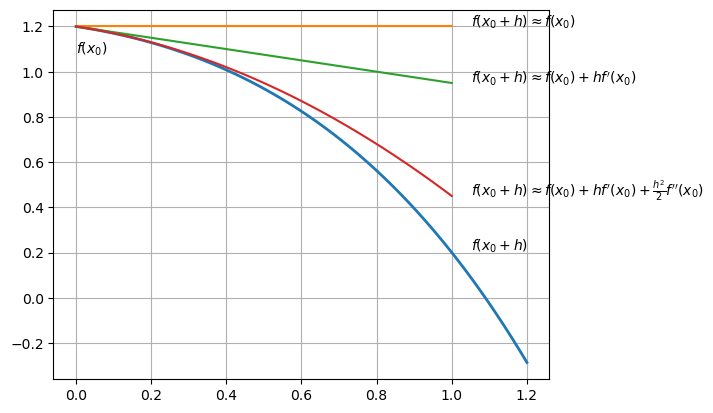

In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def f(x: float, order: int = 0):
    "Evaluate the f function and thene derivative"
    if order == 0:
        return -0.1 * x**4 - 0.15 * x**3 - 0.5 * x**2 - 0.25 * x + 1.2
    elif order == 1:
        return -0.4 * x**3 - 0.45 * x**2 - 1.0 * x - 0.25
    elif order == 2:
        return - 1.2 * x**2 - 0.9 * x - 1.0
    elif order == 3:
        return - 2.4 * x - 0.9
    elif order == 4:
        return - 2.4
    else:
        return 0.0


def truncated_taylor_serie(x_0, x, f, N):
    r"""Evaluate the Taylor N first terme of the function f.
    
    f(x) \approx \sum_{k=0}^{N}{ \frac{ f^(k)(x_0) } { k! } ( x - x_0 )^k }
    """

    h = x - x_0
    y = 0
    for i in range(N):
        y += h**i / np.math.factorial(i) * f(x_0, i)
    return y

fig, ax = plt.subplots()

#
x_0 = 0.0
h = 1.0
N = 100
dh = h*6/5
dx = h/5

#
x = np.linspace(x_0 * 0.8, x_0 + h * 1.2, N)
y = f(x)
ax.plot(x, y, linewidth=2.0)

#
x = np.linspace(x_0, x_0 + h, N)

for i, label in [
    (1, r"$f(x_0+h) \approx f(x_0)$"), 
    (2, r"$f(x_0+h) \approx f(x_0)+h f'(x_0)$"), 
    (3, r"$f(x_0+h) \approx f(x_0)+h f'(x_0) + \frac{h^2}{2} f''(x_0)$"), 
    #(4, "$f(x_0+h) \approx f(x_0)+h f'(x_0) + h^2 f''(x_0) + h^3 f'''(x_0)$")
    ]:
    y = truncated_taylor_serie(x_0, x=x, f=f, N=i)
    ax.plot(x, y)
    ax.text(x[-1] * 1.05, y[-1], label)

ax.text(x_0, f(x_0) * 0.9, "$f(x_0)$")
ax.text(x_0 + h * 1.05, f(x_0+h) * 1.05, "$f(x_0+h)$")
ax.grid()

L'erreur peut être évaluée en la regroupant dans un terme d'ordre supérieur.

$$
f(x_{i+1}) = f(x_i) + f'(x_i) h + \frac{1}{2!} f''(x_i) h^2 + \dots + \frac{1}{n!} f^{(n)}(x_i) h^n + R_n
$$

où $R_n = \frac{ f^{(n+1)}(\xi) } { (n+1)! } h^{n+1} $ est l'erreur de troncature avec $\xi$ une inconnue entre $x_{i}$ et $x_{i+1}$ (Théorème des accroissements finis). L'erreur n'est donc pas connue avec précision. Nous savons en revanche qu'elle est proportionnelle à $h^{n+1}$. On dit que l'approximation est d'ordre $h^{n+1}$, notée $\mathcal{O}(h^{n+1})$. 

Si nous prenons la série à l'ordre 2. Nous avons :

$$
f(x_{i+1}) = f(x_i) + f'(x_i) h + \mathcal{O}(h^{2})
$$

Que nous pouvons réécrire comme suit :

$$
f'(x_i) = \frac{ f(x_{i+1}) - f(x_i) } { h } - \mathcal{O}(h)
$$

On parle ici de l'approximation à droite de la dérivée. Nous noterons que l'ordre d'approximation est passé de $\mathcal{O}(n^2)$ à $\mathcal{O}(n)$ car il a été divisé par $h$. Il n'y a pas de subtilité ici et pour s'en convaincre, il suffit de revenir à la définition de l'erreur $R_n$. 

Nous pouvons également définir l'estimation de la dérivée à gauche :

$$
f'(x_i) = \frac{ f(x_i) - f(x_{i-1}) } { h } - \mathcal{O}(h)
$$

Ou encore l'approximation centrée de la dérivée.

$$
\begin{align}
f'(x_i) = \frac{ f(x_{i+1}) - f(x_{i-1}) } { 2h } - \mathcal{O}(h^2)
\end{align}
$$

Nous noterons, dans cette dernière approximation, que nous avons changé d'ordre d'approximation. Ce changement d'ordre peut paraître étrange car l'approximation centrée peut être déduite en sommant les deux autres approximations. Pour justifier le changement d'ordre, nous prenons le développement de la série de Taylor à l'ordre 3 en $x_{i+1} = x_i + h$ et en $x_{x-1} = x_i - h$. A cause de la parité de la puissance, nous avons un changement de signe alterné entre chaque terme. Ainsi, en soustrayant les deux équations, le premier et le troisième terme s'annulent. C'est cette propriété qui nous permet d'avoir une approximation à l'ordre 2.

$$
\begin{align}
f(x_{i+1}) &= f(x_i) + f'(x_i) h + \frac{1}{2!} f''(x_i) h^2 + \mathcal{O}(h^{3})\\
f(x_{i-1}) &= f(x_i) - f'(x_i) h + \frac{1}{2!} f''(x_i) h^2 + \mathcal{O}(h^{3})
\end{align}
$$

Nous pouvons tracer l'erreur de l'approximation en fonction du pas de discrétisation. Cette représentation permet de visualiser l'ordre de l'approximation. En effet, l'ordre de l'approximation se traduit dans la pente de cette erreur. De plus, nous pouvons conparer relativement les différentes approximations en comparant leurs erreurs. Par exemple dans la figure suivante, nous représentons l'erreur relative $|\tilde{f'} - f'| / |f'|$ où $\tilde{f'}$ est la valeur arrondie de la dérivée de $f$ notée $f'$. Cette courbe d'erreur est obtenue en évaluant l'erreur en $x=0.5$ de la fonction $f$ précédemment utilisée en exemple. Cette erreur est tracée pour les trois formulations de l'approximation de la dérivée de $f$.

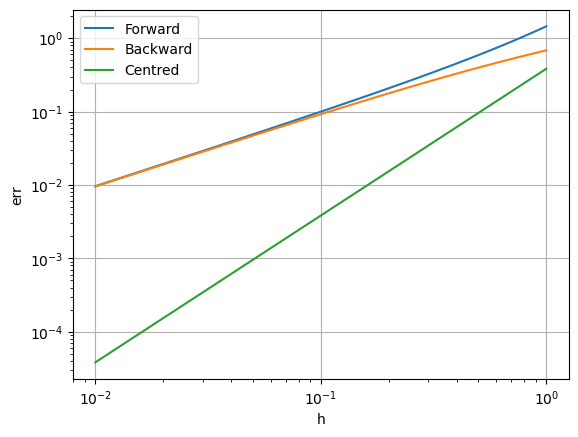

In [28]:
def dev_estimation_error(x: float, h: float):
    f_p = f(x + h)
    f_0 = f(x)
    f_m = f(x - h)

    forward = (f_p - f_0) / h
    backward = (f_0 - f_m) / h
    central = (f_p - f_m) / (2 * h)

    f_prim = f(x, 1)

    return (
        abs(forward - f_prim) / abs(f_prim),
        abs(backward - f_prim) / abs(f_prim),
        abs(central - f_prim) / abs(f_prim),
    )


x: float = 0.5
h = np.logspace(-2, 0, 100)
forward, backward, centred = dev_estimation_error(x, h)

fig, ax = plt.subplots()
ax.loglog(h, forward, label="Forward")
ax.loglog(h, backward, label="Backward")
ax.loglog(h, centred, label="Centred")
ax.legend()
ax.set_xlabel("h")
ax.set_ylabel(r"err")
ax.grid()


### Erreur Totale

L'évaluation de la dérivée n'échappe pas à l'erreur d'arrondie. Nous pouvons représenter l'erreur d'arrondie par $f = \tilde{f} - e$ où $\tilde{f}$ représente la fonction arrondie et $e$ l'erreur d'arrondie associée. Nous avons donc :

$$
f'(x_i) = \frac{ f(x_{i+1}) - f(x_{i-1}) } { 2h } - \frac{ f^{(3)}(\xi) }{ 6 } h^2 + \frac{ e_{i+1}  - e_{i-1} } { 2h }
$$

Nous pouvons déduire de cette expression l'erreur totale associée à l'approximation de la dérivée de $f$ qui prend donc la forme suivante :

$$
err = \frac{ e_{i+1}  - e_{i-1} } { 2h } - \frac{ f^{(3)}(\xi) }{ 6 } h^2
$$

Nous constatons d'une part que l'erreur de troncature est proportionnelle au carré du pas de discrétisation. D'autre part, l'erreur d'arrondie quant à elle, est inversement proportionnelle au pas de discrétisation. 

La figure trace l'erreur totale numérique.


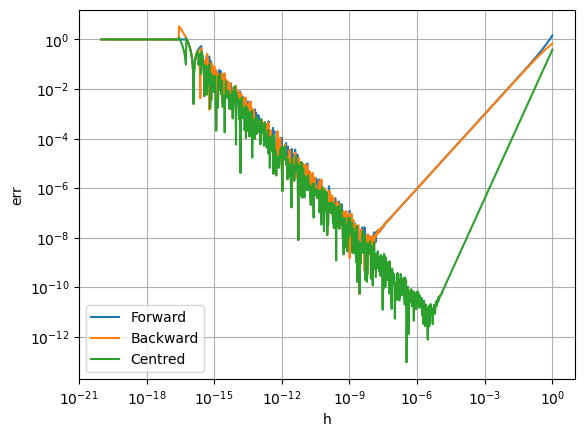

In [29]:
h = np.logspace(-20, 0, 1000)
forward, backward, centred = dev_estimation_error(x, h)

fig, ax = plt.subplots()
ax.loglog(h, forward, label="Forward")
ax.loglog(h, backward, label="Backward")
ax.loglog(h, centred, label="Centred")
ax.legend()
ax.set_xlabel("h")
ax.set_ylabel("err")
ax.grid()


L'erreur de troncature croît avec le pas de discrétisation et l'erreur d'arrondie décroît avec le pas de discrétisation. Ce résultat est un peu en opposition avec l'idée reçue que : 

$$
\left. \frac{ \Delta v } { \Delta T }\right|_{\Delta T \to 0} \ne \frac{ dv } { dt }
$$

En tout cas d'un point de vue numérique.


{cite}`roudoff_trucation_error_Webb`

## Résolution de système linéaire et inverse

La résolution des systèmes linéaires et le calcul de leurs inverses font parties intégrantes du calcul numérique. Comme tout calcul numérique sur ordinateur, ils sont sujets aux erreurs numériques comme les erreurs d'arrondies ou "numérical cancel". Prenons par exemple le système linéaire d'équation suivante :

$$
\begin{align}
2 &= 1.01 x + 0.99 y \\
2 &= 0.99 x + 1.01 y
\end{align}
$$

Qui peut être mis sous la forme matricielle de la forme $Ax = b$ suivante :

$$
\begin{bmatrix}
1.01 & 0.99 \\
0.99 & 1.01 
\end{bmatrix}
\begin{bmatrix}
x \\ y
\end{bmatrix}
=
\begin{bmatrix}
2 \\ 2
\end{bmatrix}
$$

Nous pouvons trouver relativement simplement que la solution est : $x = [1, 1]^T$, avec l'opérateur $.^T$ la transposée. Maintenant, si l'on change légèrement le second membre en le remplaçant par $\hat{b} = [2.02, 1,98]^T$ et en calculant la solution du système $A \hat{x} = \hat{b}$. Nous avons une solution très différente $\hat{x} = [2, 0]$. Dans ce cas de figure, un changement minime $\pm1\%$ produit une solution avec $\pm100\%$ de différence. Un regard attentif notera que cette matrice est "presque" singulière (matrice de 1).

Si l'on regarde les valeurs propres de ce système linéaire, nous avons : $trac(A) = \lambda_1 + \lambda_2$ et $det(1) = \lambda_1 \lambda_2$. Nous avons donc :

$$
\begin{align}
2.02 &= \lambda_1 + \lambda_2 \\
0.04 &= \lambda_1 \lambda_2
\end{align}
$$

Il vient que $\lambda_1 = 2$ et $\lambda_2 = 0.02$. Nous pouvons également nous rendre compte que la base propre est la matrice rotation de $\theta=\pi/4$ avec 

$$
R =  
\begin{bmatrix}
\cos(\theta) & - \sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

Au final, le système est construit par la relation suivante :

$$
A = R \begin{bmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{bmatrix}
R^T
$$

On se rend compte que si l'on considère le rapport $c = \max(\lambda_i) / \min(\lambda_i)$, nous avons un critère intéressant pour évaluer la stabilité du calcul de la solution d'un système linéraire. En effet dans notre cas, si $c \to 1$ la solution sera "stable". En revanche, si $c \to \infty$, la solution du système ne sera pas "stable".

Il est possible de mieux définir cette notion de stabilité. Cette notion de stabilité traduit comment la résolution du système va propager une erreur. Dans l'exemple précédent, une erreur de $1\%$ définie par $\|\hat{b} - b\|/ \|b\|$ sur le second membre, a produit une erreur de $100\%$ sur la solution $\|\hat{x} - x\|/\|x\|$. 

Le critère qui nous intéresse est un critère qui quantifie comment l'erreur se propage. Dans un premier temps, nous considérons l'erreur absolue, c'est-à-dire : $A (\hat{x} - x) = \hat{b} - b$. Il vient de façon assez naturelle que :

$$
\| \hat{x} - x \| = \|A^{-1} (\hat{b} - b)\| \le \|A^{-1}\| \|\hat{b} - b\| 
$$

avec l'opérateur $.^{-1}$ l'inverse. De façon très similaire nous avons :

$$
\| b \| = \|A x\| \le \|A\| \|x\| 
$$

En conbinant ces deux relations, nous arrivons : 

$$
\frac{ \|\hat{x} - x\| }{ \|x\| } \le \|A\| \|A^{-1}\| \frac{ \|\hat{b} - b\| }{ \|b\| }
$$

Cette inégalité permet de borner l'erreur dans le calcul de la solution du système linéaire. De plus cette borne ne dépend que de l'erreur sur le second menbre, du système linéaire et du choix de la norme.

Le conditionnement de la matrice $A$ (critère définissant la stabilité du calcul de la solution) est définie par :

$$
cond(A) = \|A\| \|A^{-1}\|
$$

que l'on peut indicer avec le choix de la norme par exemple $cond_{\infty}(A)$ pour la norme infinie.

En définitive plus le conditionement est petit moins l'erreur se propage et plus la résolution est robuste.

In [30]:
import numpy.linalg as lg

A = np.array(((1.01, 0.99), (0.99, 1.01)))
print("Cond(A)=%g" % lg.cond(A))

Cond(A)=100
